Основная цель этого исследования - проанализировать и спрогнозировать курс акций компании Amazon. 

Для нашего исследования мы выбрали 3 разных подхода: статистические методы, прогнозирование временных рядов и нейронные сети. 

Используются алгоритмы машинного обучения:
* Linear Regression
* ARIMA
* LSTM
* Decision Tree Classifier
* KNN

In [1]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)

In [3]:
# https://finance.yahoo.com/quote/AMZN/history/ - скачать можно тут (период: декабрь 2019 - декабрь 2020)

In [4]:
#Get the stock quote
data = pd.read_csv('AMZN.csv')
#Show teh data
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-13,67.864998,68.824997,67.732498,68.787498,67.644707,133587600
1,2019-12-16,69.250000,70.197502,69.245003,69.964996,68.802635,128186000
2,2019-12-17,69.892502,70.442497,69.699997,70.102501,68.937851,114158400
3,2019-12-18,69.949997,70.474998,69.779999,69.934998,68.773132,116028400
4,2019-12-19,69.875000,70.294998,69.737503,70.004997,68.841965,98369200
...,...,...,...,...,...,...,...
247,2020-12-07,122.309998,124.570000,122.250000,123.750000,123.750000,86712000
248,2020-12-08,124.370003,124.980003,123.089996,124.379997,124.379997,82225500
249,2020-12-09,124.529999,125.949997,121.000000,121.779999,121.779999,115089200
250,2020-12-10,120.500000,123.870003,120.150002,123.239998,123.239998,81312200


In [5]:
# Create a new DataFrame with only closing price and date
df = pd.DataFrame(data, columns=['Adj Close'])

# Reset index column so that we have integers to represent time for later analysis
df = df.reset_index()

In [6]:
df.head()

,index,Adj Close
0,0,67.644707
1,1,68.802635
2,2,68.937851
3,3,68.773132
4,4,68.841965


In [7]:
# Check for missing values in the columns
df.isna().values.any()

False

In [8]:
# Import package for splitting data set
from sklearn.model_selection import train_test_split
# Split data into train and test set: 80% / 20%
train, test = train_test_split(df, test_size=0.20)

# LinearRegression

In [9]:
# Регрессия ищет отношения между переменными, то есть вам нужно найти функцию, 
# которая отображает зависимость одних переменных или данных от других.

# В данном случае рассматривается зависимость price от time

In [10]:
# Import package for linear model
from sklearn.linear_model import LinearRegression

In [11]:
# Reshape index column to 2D array for .fit() method
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Adj Close']

In [12]:
# Create LinearRegression Object
model = LinearRegression()
# Fit linear model using the train data set
model.fit(X_train, y_train)

LinearRegression()

In [13]:
model = LinearRegression()
# Fit linear model using the train data set
model.fit(X_train, y_train)

LinearRegression()

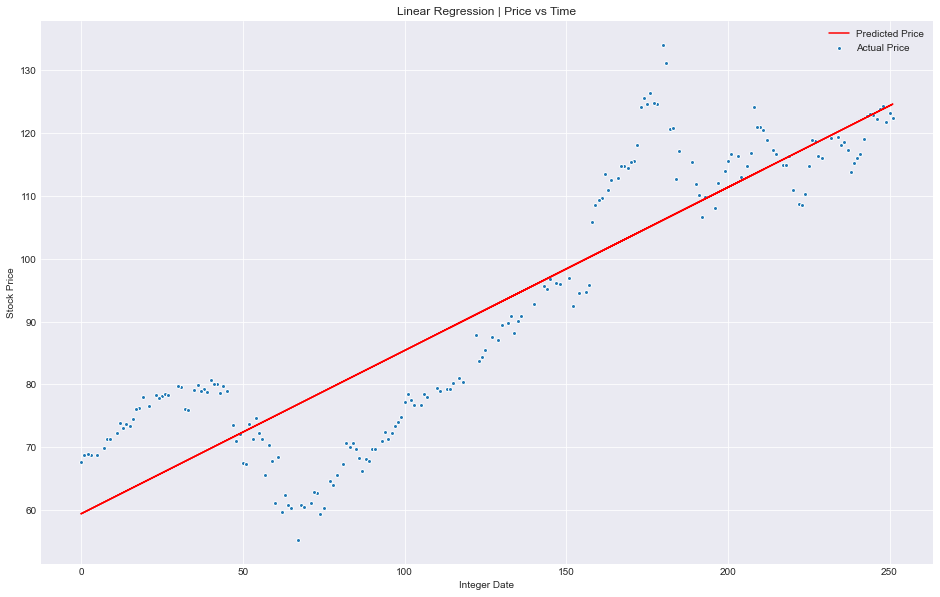

In [14]:
# Train set graph
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [15]:
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Adj Close']

In [16]:
# Generate array with predicted values
y_pred = model.predict(X_test)
df['Prediction'] = model.predict(np.array(df.index).reshape(-1, 1))

In [17]:
df.head()

,index,Adj Close,Prediction
0,0,67.644707,59.407554
1,1,68.802635,59.667324
2,2,68.937851,59.927095
3,3,68.773132,60.186866
4,4,68.841965,60.446637


In [18]:
# Generate 25 random numbers
randints = np.random.randint(252, size=25)

# Select row numbers == random numbers
df_sample = df[df.index.isin(randints)]

In [19]:
df_sample.head()

,index,Adj Close,Prediction
9,9,71.246353,61.745491
13,13,73.122154,62.784575
31,31,79.622337,67.460451
44,44,79.749702,70.837472
53,53,71.297157,73.175410


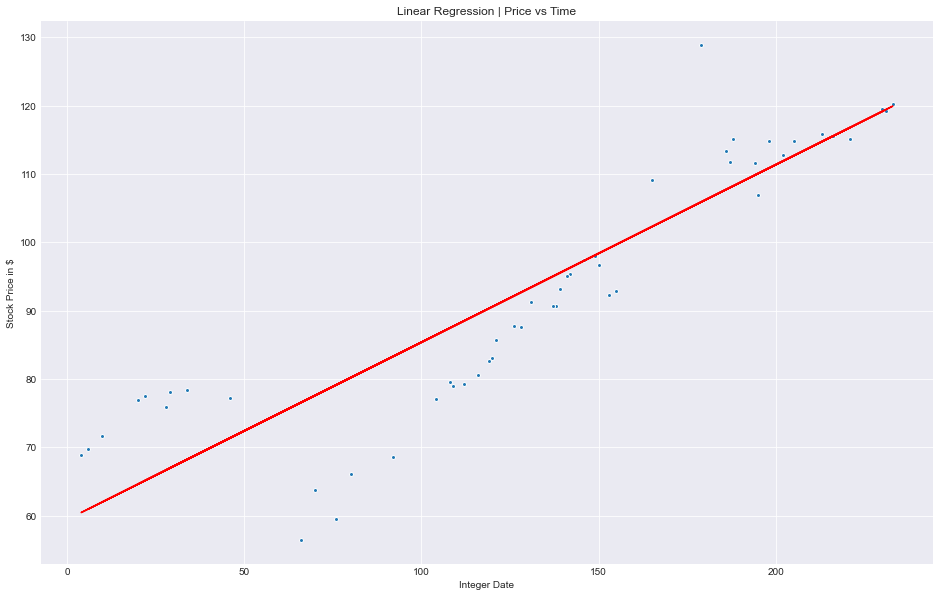

In [20]:
# Plot fitted line, y test
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.plot(X_test, model.predict(X_test), color='r', label='Predicted Price')
plt.scatter(X_test, y_test, edgecolor='w', label='Actual Price')

plt.xlabel('Integer Date')
plt.ylabel('Stock Price in $')

plt.show()

In [21]:
# Import metrics package from sklearn for statistical analysis
from sklearn import metrics

In [22]:
# Calculate and print values of MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Mean Absolute Percentage Error:', np.mean(np.abs((y_test - y_pred) / y_test)*100)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 6.60909168419968
Mean Squared Error: 72.99662826751029
Mean Absolute Percentage Error: 8.37745119985399
Root Mean Squared Error: 8.543806427319751


In [23]:
print('R2: ', metrics.r2_score(y_test, y_pred))

R2:  0.7853595033369435


# ARIMA

Временные ряды позволяют прогнозировать значения. На основании предыдущих значений временных рядов можно спрогнозировать тенденции в экономике и погоде или спланировать пропускную способность. Ввиду особенных свойств данных временных рядов для работы с ними применяются специализированные статистические методы и подходы.


ARIMA - очень популярный статистический метод для прогнозирования временных рядов. ARIMA - это сокращение "Auto-Regressive Integrated Moving Averages". Модели ARIMA работают на следующих предположениях:

1. Ряд данных является стационарным, что означает, что среднее значение и дисперсия не должны изменяться со временем. Ряд может быть сделан стационарным взятием разностей некоторого порядка от исходного временного ряда.
2. Данные, предоставляемые в качестве входных данных, должны быть одномерной последовательностью, поскольку arima использует прошлые значения для прогнозирования будущих значений.

ARIMA состоит из трех компонентов - AR (авторегрессия), I (разность) и MA (скользящая средняя). Давайте разберемся с каждым из этих компонентов:

1. Термин AR относится к прошлым значениям, используемым для прогнозирования следующего значения. Термин AR определяется параметром «p» в arima. Значение «p» определяется с использованием графика ACF.
2. Термин MA используется для определения количества прошлых ошибок прогноза, используемых для прогнозирования будущих значений. Параметр «q» в ариме представляет собой МА. График PACF используется для определения правильного значения q.
3. Порядок взятия разностей определяет, сколько раз операция взятия разностей выполняется на ряде, чтобы сделать его стационарным. Такие тесты, как ADF и KPSS, могут использоваться для определения того, является ли ряд стационарным, и помогают определить значение d.


#### Пошаговая реализация ARIMA 
1. Загрузка данных: первый шаг для построения модели - это, конечно, загрузка набора данных
2. Предварительная обработка: в зависимости от набора данных будут определены этапы предварительной обработки. Они могут включать создание временных отметок, преобразование dtype столбца даты/времени, превращение ряда в одномерный и т. д.
3. Преобразование ряда в стационарный. Чтобы удовлетворить требованиям алгоритма, необходимо сделать ряд стационарным. Этот этап будет включать проверку стационарности ряда и выполнение необходимых преобразований.
4. Определение значения d: для того, чтобы сделать ряд стационарным, количество выполнений операций взятия разности будет приниматься как значение d.
5. Создание графиков ACF и PACF: это самый важный шаг в реализации ARIMA. Графики ACF и PACF используются для определения входных параметров для нашей модели ARIMA.
6. Определение значений p и q: считайте значения p и q с графиков из предыдущего шага.
7. Подгонка модели ARIMA: используя обработанные данные и значения параметров, которые мы рассчитали из предыдущих шагов, подгоняем модель ARIMA.
8. Прогнозирование значений на проверочном наборе данных: прогнозируем будущие значения.
9. Расчет среднеквадратичной ошибки: для проверки эффективности модели проверьте значение среднеквадратичной ошибки модели, используя прогнозные и фактические значения в проверочном наборе данных.

In [24]:
#Import the libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

In [25]:
#Get the stock quote
df = pd.read_csv('AMZN.csv')
#Show teh data
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-13,67.864998,68.824997,67.732498,68.787498,67.644707,133587600
1,2019-12-16,69.250000,70.197502,69.245003,69.964996,68.802635,128186000
2,2019-12-17,69.892502,70.442497,69.699997,70.102501,68.937851,114158400
3,2019-12-18,69.949997,70.474998,69.779999,69.934998,68.773132,116028400
4,2019-12-19,69.875000,70.294998,69.737503,70.004997,68.841965,98369200
...,...,...,...,...,...,...,...
247,2020-12-07,122.309998,124.570000,122.250000,123.750000,123.750000,86712000
248,2020-12-08,124.370003,124.980003,123.089996,124.379997,124.379997,82225500
249,2020-12-09,124.529999,125.949997,121.000000,121.779999,121.779999,115089200
250,2020-12-10,120.500000,123.870003,120.150002,123.239998,123.239998,81312200


In [26]:
df1 = df['Adj Close']
df1

0       67.644707
1       68.802635
2       68.937851
3       68.773132
4       68.841965
          ...    
247    123.750000
248    124.379997
249    121.779999
250    123.239998
251    122.410004
Name: Adj Close, Length: 252, dtype: float64

In [27]:
from statsmodels.tsa.stattools import adfuller
#Perform Dickey-Fuller test:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(df1, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -0.507947
p-value                          0.890456
#Lags Used                       1.000000
Number of Observations Used    250.000000
Critical Value (1%)             -3.456781
Critical Value (5%)             -2.873172
Critical Value (10%)            -2.572969
dtype: float64


No handles with labels found to put in legend.


<function matplotlib.pyplot.show(*args, **kw)>

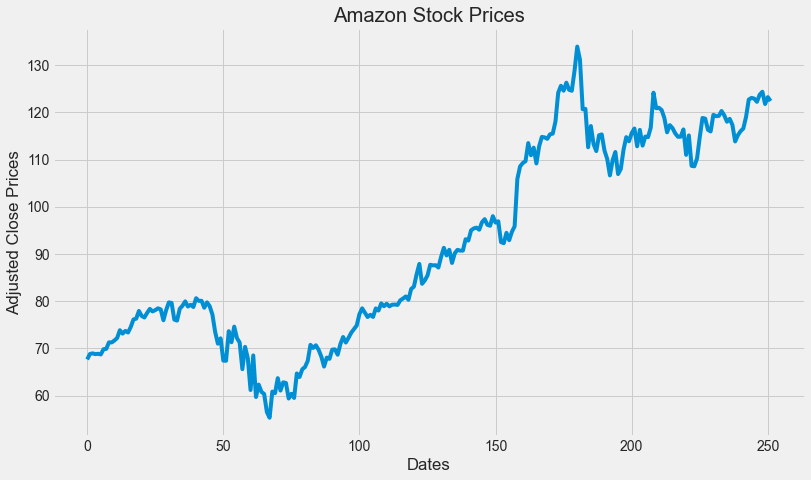

In [28]:
plt.figure(figsize=(12,7))
plt.title('Amazon Stock Prices')
plt.xlabel('Dates')
plt.ylabel('Adjusted Close Prices')
plt.legend()
plt.plot(df1)
plt.show

<ipython-input-29-22948f1abcf5>:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(df1, freq=100)


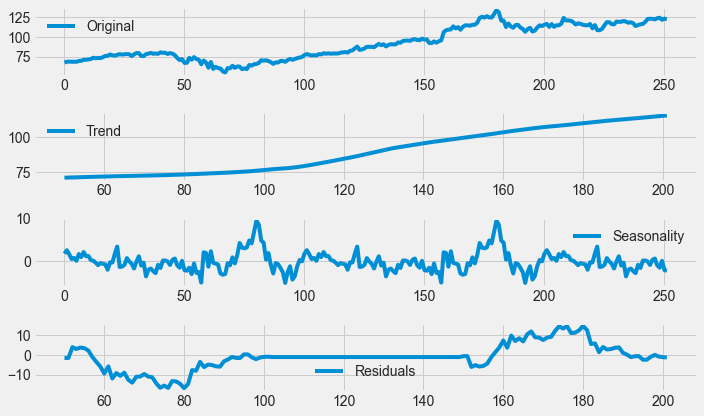

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Сезонная декомпозиция с использованием скользящих средних.
# Чтобы разложить временной ряд таким образом, чтобы отделить его тренд от его сезонных и остаточных компонентов.
decomposition = seasonal_decompose(df1, freq=100)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df1, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality') # Сезонные компоненты
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals') # Остаточные компоненты
plt.legend(loc='best')
plt.tight_layout()

<ipython-input-30-b36c36968482>:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(df1,model='additive',freq=100)


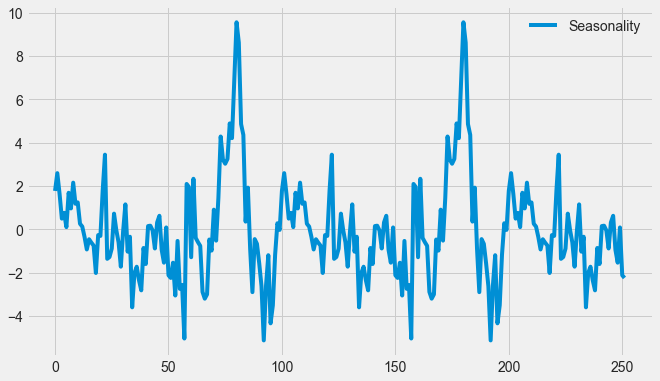

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df1,model='additive',freq=100)
seasonal = decomposition.seasonal
#plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')

In [31]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [32]:
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(df1, star1t_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(2,1,1)(0,0,1)[12] intercept   : AIC=1181.133, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1181.972, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1177.872, Time=0.12 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1178.800, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1181.835, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1175.873, Time=0.04 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1177.871, Time=0.11 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1177.171, Time=0.33 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=1177.147, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1177.211, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1176.801, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=1179.133, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[12]             : AIC=1176.516, Time=0.02 sec

Best model:  ARIMA(1,1,0)(0,0,0)[12] intercept
Total fit time: 1.393 seconds
1175.872

In [33]:
stepwise_model

ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True)

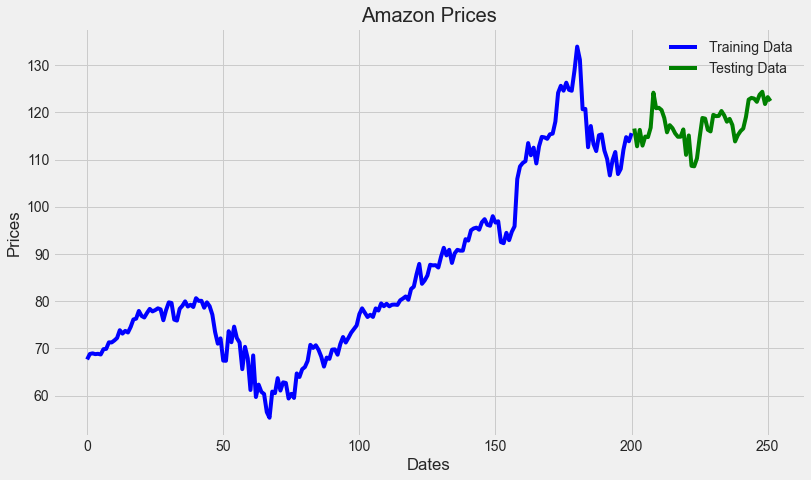

In [34]:
train_data= df1[0:int(len(df1)*0.8)]
test_data = df1[int(len(df1)*0.8):]

plt.figure(figsize=(12,7))
plt.title('Amazon Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data, 'blue', label='Training Data')
plt.plot(test_data, 'green', label='Testing Data')
plt.legend()

In [35]:
train_data

0       67.644707
1       68.802635
2       68.937851
3       68.773132
4       68.841965
          ...    
196    108.033615
197    112.086624
198    114.762009
199    113.893501
200    115.610542
Name: Adj Close, Length: 201, dtype: float64

In [36]:
test_data

201    116.588860
202    112.825348
203    116.299355
204    112.965111
205    114.881805
206    114.771988
207    116.768547
208    124.185753
209    120.891434
210    120.981277
211    120.502106
212    118.815010
213    115.780251
214    117.307617
215    116.668724
216    115.550644
217    114.841873
218    114.851852
219    116.399178
220    111.008476
221    115.121384
222    108.672516
223    108.582664
224    110.249794
225    114.752022
226    118.824997
227    118.690002
228    116.320000
229    115.970001
230    119.489998
231    119.209999
232    119.260002
233    120.300003
234    119.389999
235    118.029999
236    118.639999
237    117.339996
238    113.849998
239    115.169998
240    116.029999
241    116.589996
242    119.050003
243    122.720001
244    123.080002
245    122.940002
246    122.250000
247    123.750000
248    124.379997
249    121.779999
250    123.239998
251    122.410004
Name: Adj Close, dtype: float64

In [37]:
stepwise_model.fit(train_data)

ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True)

In [38]:
future_forecast = stepwise_model.predict(n_periods=len(test_data))

In [39]:
future_forecast

array([115.59816347, 115.87866399, 116.10956513, 116.34886598,
       116.58674433, 116.82486359, 117.06294204, 117.30102741,
       117.5391116 , 117.77719599, 118.01528035, 118.25336472,
       118.49144908, 118.72953344, 118.96761781, 119.20570217,
       119.44378653, 119.6818709 , 119.91995526, 120.15803963,
       120.39612399, 120.63420835, 120.87229272, 121.11037708,
       121.34846144, 121.58654581, 121.82463017, 122.06271454,
       122.3007989 , 122.53888326, 122.77696763, 123.01505199,
       123.25313635, 123.49122072, 123.72930508, 123.96738944,
       124.20547381, 124.44355817, 124.68164254, 124.9197269 ,
       125.15781126, 125.39589563, 125.63397999, 125.87206435,
       126.11014872, 126.34823308, 126.58631745, 126.82440181,
       127.06248617, 127.30057054, 127.5386549 ])

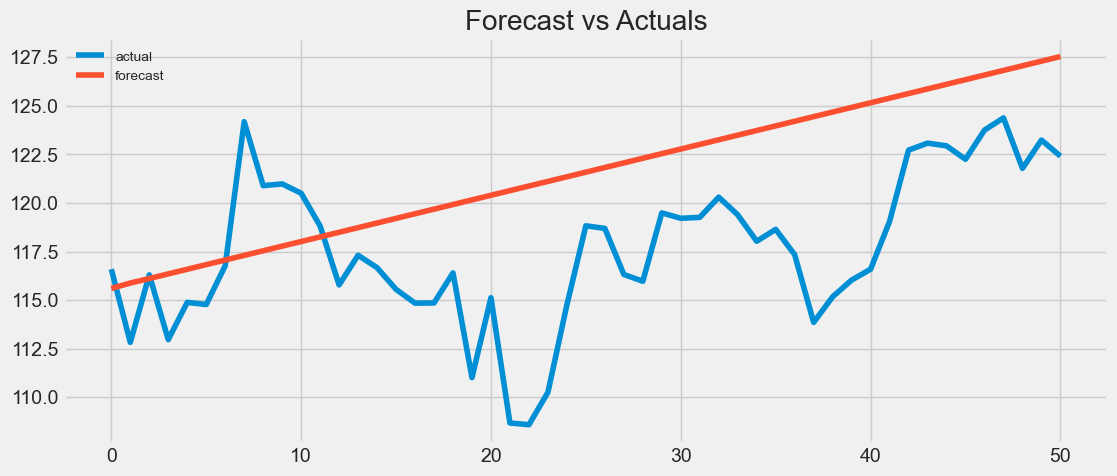

In [40]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
#plt.plot(train_data, label='training')
plt.plot(test_data.values, label='actual')
plt.plot(future_forecast, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [41]:
result = pd.DataFrame(columns=['test', 'predicted'])

result['test'] = test_data
result['predicted'] = future_forecast

In [42]:
result

,test,predicted
201,116.588860,115.598163
202,112.825348,115.878664
203,116.299355,116.109565
204,112.965111,116.348866
205,114.881805,116.586744
206,114.771988,116.824864
207,116.768547,117.062942
208,124.185753,117.301027
209,120.891434,117.539112
210,120.981277,117.777196


In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    
    rmse = math.sqrt(mean_squared_error(test_data, future_forecast))  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    return({'MAPE':mape, 'RMSE':rmse,'Correlation':corr})
forecast_accuracy(future_forecast, test_data)

{'MAPE': 0.04001683823148461,
 'RMSE': 5.494839781292171,
 'Correlation': 0.46497387544279317}

In [44]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test_data, future_forecast))  
print('Mean Squared Error:', metrics.mean_squared_error(test_data, future_forecast)) 

Mean Absolute Error: 4.6520472132114286
Mean Squared Error: 30.193264222070994


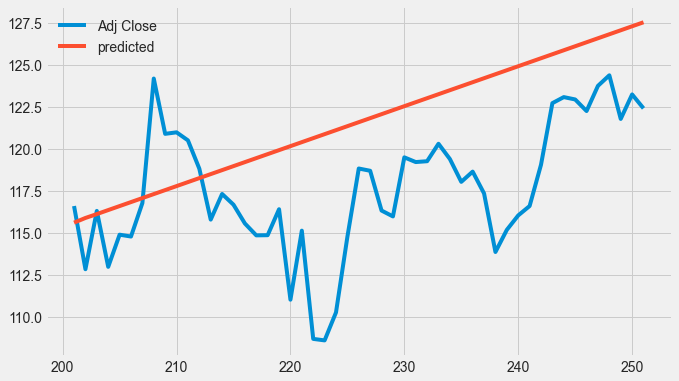

In [45]:
pd.concat([test_data,result['predicted']], axis=1).plot()

In [46]:
future_forecast2 = future_forecast

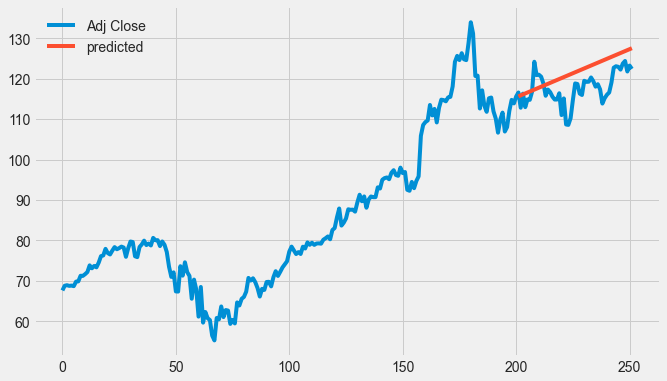

In [47]:
pd.concat([df1,result['predicted']], axis=1).plot()

# Lstm

In [48]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from tensorflow.python.keras.layers import Dense,LSTM
from tensorflow.python.keras import Sequential
from keras import metrics
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [49]:
#Get the stock quote
df = pd.read_csv('AMZN.csv')
#Show teh data
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-13,67.864998,68.824997,67.732498,68.787498,67.644707,133587600
1,2019-12-16,69.250000,70.197502,69.245003,69.964996,68.802635,128186000
2,2019-12-17,69.892502,70.442497,69.699997,70.102501,68.937851,114158400
3,2019-12-18,69.949997,70.474998,69.779999,69.934998,68.773132,116028400
4,2019-12-19,69.875000,70.294998,69.737503,70.004997,68.841965,98369200
...,...,...,...,...,...,...,...
247,2020-12-07,122.309998,124.570000,122.250000,123.750000,123.750000,86712000
248,2020-12-08,124.370003,124.980003,123.089996,124.379997,124.379997,82225500
249,2020-12-09,124.529999,125.949997,121.000000,121.779999,121.779999,115089200
250,2020-12-10,120.500000,123.870003,120.150002,123.239998,123.239998,81312200


In [50]:
#Get the number of rows and columns in the data set
df.shape

(252, 7)

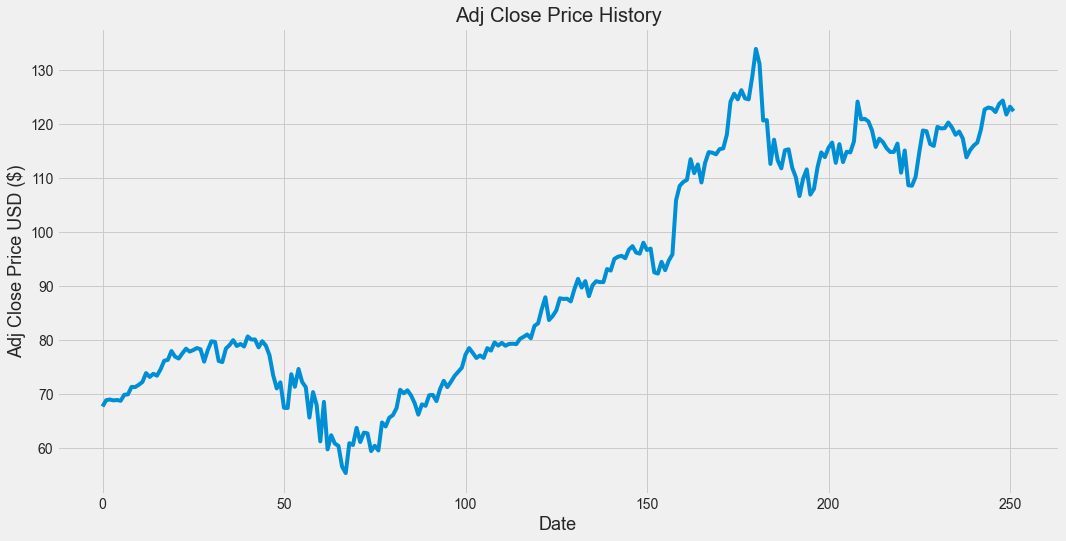

In [51]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Adj Close Price History')
plt.plot(df['Adj Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj Close Price USD ($)', fontsize=18)
plt.show()

In [52]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Adj Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

202

In [53]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.15705059],
       [0.17177175],
       [0.1734908 ],
       [0.17139667],
       [0.17227177],
       [0.17045913],
       [0.18471151],
       [0.18555537],
       [0.20318339],
       [0.20283963],
       [0.2082156 ],
       [0.21487296],
       [0.23581415],
       [0.22668738],
       [0.23409501],
       [0.22968813],
       [0.24469058],
       [0.26481913],
       [0.26700686],
       [0.28772913],
       [0.27435193],
       [0.27016367],
       [0.28235336],
       [0.29326145],
       [0.28651028],
       [0.29004217],
       [0.29482424],
       [0.29194872],
       [0.26269368],
       [0.29001085],
       [0.31079577],
       [0.30932658],
       [0.26444405],
       [0.26178725],
       [0.29363653],
       [0.30176299],
       [0.31351485],
       [0.29969854],
       [0.30446063],
       [0.2983827 ],
       [0.32216187],
       [0.314862  ],
       [0.31511274],
       [0.2964716 ],
       [0.31094582],
       [0.30054453],
       [0.27783056],
       [0.231

In [54]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.15705059, 0.17177175, 0.1734908 , 0.17139667, 0.17227177,
       0.17045913, 0.18471151, 0.18555537, 0.20318339, 0.20283963,
       0.2082156 , 0.21487296, 0.23581415, 0.22668738, 0.23409501,
       0.22968813, 0.24469058, 0.26481913, 0.26700686, 0.28772913,
       0.27435193, 0.27016367, 0.28235336, 0.29326145, 0.28651028,
       0.29004217, 0.29482424, 0.29194872, 0.26269368, 0.29001085,
       0.31079577, 0.30932658, 0.26444405, 0.26178725, 0.29363653,
       0.30176299, 0.31351485, 0.29969854, 0.30446063, 0.2983827 ,
       0.32216187, 0.314862  , 0.31511274, 0.2964716 , 0.31094582,
       0.30054453, 0.27783056, 0.23124344, 0.19960057, 0.21391824,
       0.15398476, 0.15348349, 0.2332172 , 0.20348552, 0.24552968,
       0.21476414, 0.20257687, 0.13095769, 0.1910164 , 0.15996879])]
[0.07475232552561928]



In [55]:
#Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [56]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(142, 60, 1)

In [57]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [58]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [59]:
#Train the model
model.fit(x_train, y_train, epochs=1, batch_size=1)

142/142 [==============================] - 5s 34ms/step - loss: 0.0205


In [60]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [61]:
#Convert the data to a numpy array
x_test = np.array(x_test)
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
#Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

<ipython-input-63-8bfb0dd0ce16>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


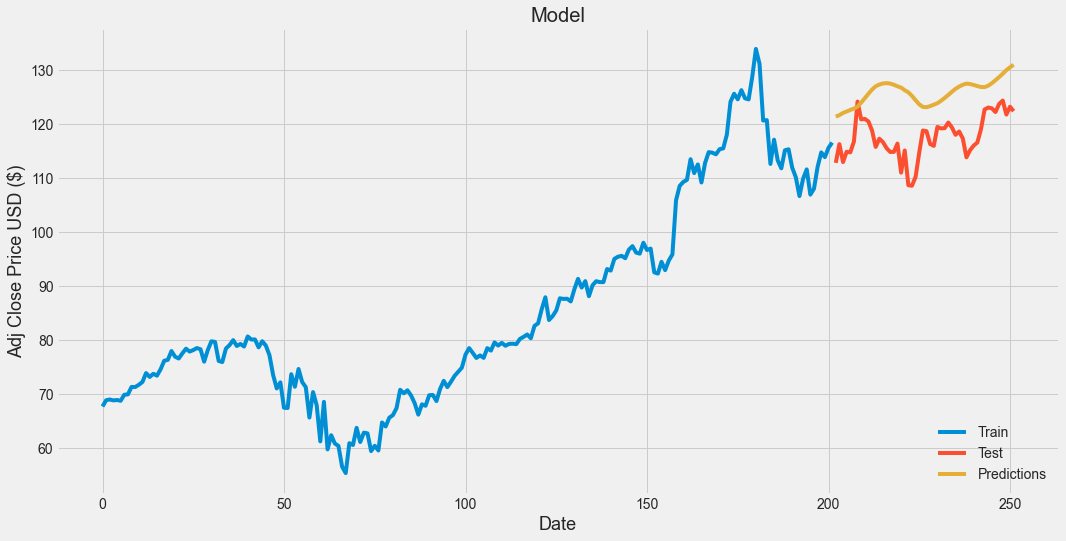

In [63]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj Close Price USD ($)', fontsize=18)
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()

In [64]:
#Show the valid and predicted prices
valid

,Adj Close,Predictions
202,112.825348,121.396439
203,116.299355,121.676979
204,112.965111,122.079575
205,114.881805,122.351997
206,114.771988,122.635841
207,116.768547,122.898140
208,124.185753,123.239136
209,120.891434,124.001915
210,120.981277,124.813690
211,120.502106,125.642128


In [65]:
#Get the quote
quote_quote = pd.read_csv('AMZN.csv')
#Create a new dataframe
new_df = quote_quote.filter(['Adj Close'])
#Get teh last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[65.42702]]


In [67]:
# Import metrics package from sklearn for statistical analysis
from sklearn import metrics

In [68]:
# Calculate and print values of MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predictions ))  
print('Mean Absolute Percentage Error:', np.mean(np.abs((predictions - y_test ) / y_test)*100)) 
print('Root Mean Squared Error:', np.sqrt(np.mean(((predictions- y_test)**2))))

Mean Absolute Error: 8.293195532763672
Mean Squared Error: 82.09395753050235
Mean Absolute Percentage Error: 7.1424111813699245
Root Mean Squared Error: 9.060571589613005


# Decision Tree Classifier

Дерево решений — это метод представления решающих правил в иерархической структуре, состоящей из элементов двух типов — узлов (node) и листьев (leaf). В узлах находятся решающие правила и производится проверка соответствия примеров этому правилу по какому-либо атрибуту обучающего множества.


Затем к каждому подмножеству вновь применяется правило и процедура рекурсивно повторяется пока не будет достигнуто некоторое условие остановки алгоритма. В результате в последнем узле проверка и разбиение не производится и он объявляется листом. Лист определяет решение для каждого попавшего в него примера. Для дерева классификации — это класс, ассоциируемый с узлом, а для дерева регрессии — соответствующий листу модальный интервал целевой переменной.


Таким образом, в отличие от узла, в листе содержится не правило, а подмножество объектов, удовлетворяющих всем правилам ветви, которая заканчивается данным листом.


Очевидно, чтобы попасть в лист, пример должен удовлетворять всем правилам, лежащим на пути к этому листу. Поскольку путь в дереве к каждому листу единственный, то и каждый пример может попасть только в один лист, что обеспечивает единственность решения.

In [115]:
from sklearn.metrics import accuracy_score

In [116]:
#Get the stock quote
df = pd.read_csv('AMZN.csv')
#Show teh data
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-13,67.864998,68.824997,67.732498,68.787498,67.644707,133587600
1,2019-12-16,69.250000,70.197502,69.245003,69.964996,68.802635,128186000
2,2019-12-17,69.892502,70.442497,69.699997,70.102501,68.937851,114158400
3,2019-12-18,69.949997,70.474998,69.779999,69.934998,68.773132,116028400
4,2019-12-19,69.875000,70.294998,69.737503,70.004997,68.841965,98369200
...,...,...,...,...,...,...,...
247,2020-12-07,122.309998,124.570000,122.250000,123.750000,123.750000,86712000
248,2020-12-08,124.370003,124.980003,123.089996,124.379997,124.379997,82225500
249,2020-12-09,124.529999,125.949997,121.000000,121.779999,121.779999,115089200
250,2020-12-10,120.500000,123.870003,120.150002,123.239998,123.239998,81312200


In [117]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [118]:
layout = go.Layout(
    title='Amazon Stock Prices',
        xaxis=dict(
            title='date',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='blue'
            )
        ),
        yaxis=dict(
            title='Price',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='red'
        )
    )
)
df_data = [{'x':df['Date'], 'y':df['Close']}]
plot = go.Figure(data=df_data, layout=layout)

In [119]:
iplot(plot)

In [120]:
df['Open-Close']= df.Close - df.Open
df['High-Low']  = df.High - df.Low
df = df.dropna()
X= df[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
0,0.922500,1.092499
1,0.714996,0.952499
2,0.209999,0.742500
3,-0.014999,0.694999
4,0.129997,0.557495


In [121]:
Y= np.where(df['Adj Close'].shift(-1)>df['Adj Close'],1,-1)

In [122]:
split_percentage = 0.8
split = int(split_percentage*len(df))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

In [123]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

%pylab inline
%matplotlib inline

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
print(model)

accuracy_train = accuracy_score(Y_train, model.predict(X_train))
accuracy_test = accuracy_score(Y_test, model.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)

Populating the interactive namespace from numpy and matplotlib
DecisionTreeClassifier()
Train_data Accuracy: 1.00
Test_data Accuracy: 0.47


In [124]:
model.score(X_train, Y_train)

1.0

In [125]:
probability = model.predict_proba(X_test)
print(probability)

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [126]:
predicted = model.predict(X_test)

In [127]:
from sklearn import metrics

In [128]:
print(metrics.confusion_matrix(Y_test, predicted))

[[11 15]
 [12 13]]


In [129]:
print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

          -1       0.48      0.42      0.45        26
           1       0.46      0.52      0.49        25

    accuracy                           0.47        51
   macro avg       0.47      0.47      0.47        51
weighted avg       0.47      0.47      0.47        51



In [130]:
print(model.score(X_train,Y_train))

1.0


ACCURACY OF TRAINING MODEL FOR AMAZON STOCK MARKET PRICE PREDICTION IS ABOUT 100%

In [131]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [132]:
pipe_line = Pipeline([('clf', DecisionTreeClassifier())])

In [133]:
pipe_line.fit(X_train, Y_train)

Pipeline(steps=[('clf', DecisionTreeClassifier())])

In [134]:
pipe_line.score(X_train, Y_train)

1.0

In [135]:
from sklearn.model_selection import cross_val_score

In [136]:
score = cross_val_score(estimator=pipe_line, X=X, y=Y, cv=10)

print('cv accuracy score : %s' % score)
print('cv accuracy : %.3f +/- %.3f' % (np.mean(score), np.std(score)))

cv accuracy score : [0.53846154 0.34615385 0.6        0.44       0.48       0.56
 0.64       0.44       0.4        0.52      ]
cv accuracy : 0.496 +/- 0.087


In [137]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, predicted))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test,predicted ))  
print('Mean Absolute Percentage Error:', np.mean(np.abs((predicted - Y_test ) / Y_test)*100) - 100) 
print('Root Mean Squared Error:', np.sqrt(np.mean(((predicted- Y_test)**2))))

Mean Absolute Error: 1.0588235294117647
Mean Squared Error: 2.1176470588235294
Mean Absolute Percentage Error: 5.882352941176464
Root Mean Squared Error: 1.4552137502179978


# K-NEAREST-NEIGHBORS

Алгоритм K-ближайших соседей (KNN) использует «сходство признаков» для прогнозирования значений новых точек данных, что также означает, что новой точке данных будет присвоено значение на основе того, насколько близко он соответствует точкам в обучающем наборе.

In [92]:
import warnings 
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [93]:
#Get the stock quote
df = pd.read_csv('AMZN.csv')
#Show teh data
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-13,67.864998,68.824997,67.732498,68.787498,67.644707,133587600
1,2019-12-16,69.250000,70.197502,69.245003,69.964996,68.802635,128186000
2,2019-12-17,69.892502,70.442497,69.699997,70.102501,68.937851,114158400
3,2019-12-18,69.949997,70.474998,69.779999,69.934998,68.773132,116028400
4,2019-12-19,69.875000,70.294998,69.737503,70.004997,68.841965,98369200
...,...,...,...,...,...,...,...
247,2020-12-07,122.309998,124.570000,122.250000,123.750000,123.750000,86712000
248,2020-12-08,124.370003,124.980003,123.089996,124.379997,124.379997,82225500
249,2020-12-09,124.529999,125.949997,121.000000,121.779999,121.779999,115089200
250,2020-12-10,120.500000,123.870003,120.150002,123.239998,123.239998,81312200


In [94]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [95]:
layout = go.Layout(
    title='Amazon Stock Prices',
        xaxis=dict(
            title='date',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='blue'
            )
        ),
        yaxis=dict(
            title='Price',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='red'
        )
    )
)
df_data = [{'x':df['Date'], 'y':df['Close']}]
plot = go.Figure(data=df_data, layout=layout)

In [96]:
iplot(plot)

In [97]:
df['Open-Close']= df.Close - df.Open
df['High-Low']  = df.High - df.Low
df = df.dropna()
X= df[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
0,0.922500,1.092499
1,0.714996,0.952499
2,0.209999,0.742500
3,-0.014999,0.694999
4,0.129997,0.557495


In [98]:
Y= np.where(df['Close'].shift(-1)>df['Close'],1,-1)

In [99]:
split_percentage = 0.7
split = int(split_percentage*len(df))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

In [100]:
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train, Y_train)

accuracy_train = accuracy_score(Y_train, knn.predict(X_train))
accuracy_test = accuracy_score(Y_test, knn.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)

Train_data Accuracy: 0.61
Test_data Accuracy: 0.58


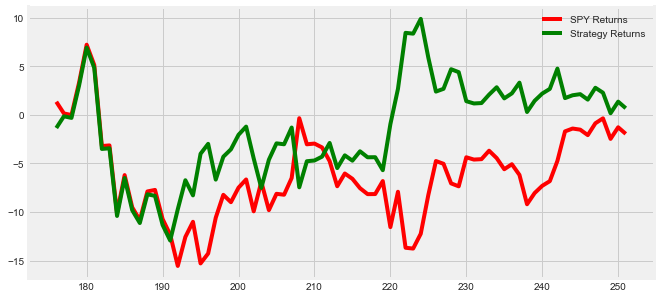

In [101]:
df['Predicted_Signal'] = knn.predict(X)

df['SPY_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_SPY_returns = df[split:]['SPY_returns'].cumsum()*100
 
df['Startegy_returns'] = df['SPY_returns']* df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = df[split:]['Startegy_returns'].cumsum()*100

plt.figure(figsize=(10,5))
plt.plot(Cumulative_SPY_returns, color='r',label = 'SPY Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

In [102]:
Std = Cumulative_Strategy_returns.std()
Sharpe = (Cumulative_Strategy_returns-Cumulative_SPY_returns)/Std
Sharpe = Sharpe.mean()
print ('Sharpe ratio: %.2f'%Sharpe )

Sharpe ratio: 0.94


In [103]:
model = knn.fit(X_train, Y_train)
model = model.fit (X_train,Y_train)

In [104]:
probability = model.predict_proba(X_test)
print(probability)

[[0.53333333 0.46666667]
 [0.13333333 0.86666667]
 [0.33333333 0.66666667]
 [0.46666667 0.53333333]
 [0.46666667 0.53333333]
 [0.26666667 0.73333333]
 [0.33333333 0.66666667]
 [0.46666667 0.53333333]
 [0.26666667 0.73333333]
 [0.4        0.6       ]
 [0.33333333 0.66666667]
 [0.33333333 0.66666667]
 [0.6        0.4       ]
 [0.33333333 0.66666667]
 [0.26666667 0.73333333]
 [0.53333333 0.46666667]
 [0.33333333 0.66666667]
 [0.53333333 0.46666667]
 [0.53333333 0.46666667]
 [0.33333333 0.66666667]
 [0.53333333 0.46666667]
 [0.46666667 0.53333333]
 [0.66666667 0.33333333]
 [0.26666667 0.73333333]
 [0.46666667 0.53333333]
 [0.33333333 0.66666667]
 [0.6        0.4       ]
 [0.53333333 0.46666667]
 [0.2        0.8       ]
 [0.46666667 0.53333333]
 [0.33333333 0.66666667]
 [0.6        0.4       ]
 [0.53333333 0.46666667]
 [0.33333333 0.66666667]
 [0.53333333 0.46666667]
 [0.53333333 0.46666667]
 [0.26666667 0.73333333]
 [0.33333333 0.66666667]
 [0.46666667 0.53333333]
 [0.6        0.4       ]


In [105]:
predicted = model.predict(X_test)

In [106]:
from sklearn import metrics

In [107]:
print(metrics.confusion_matrix(Y_test, predicted))

[[17 21]
 [11 27]]


In [108]:
print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

          -1       0.61      0.45      0.52        38
           1       0.56      0.71      0.63        38

    accuracy                           0.58        76
   macro avg       0.58      0.58      0.57        76
weighted avg       0.58      0.58      0.57        76



In [109]:
print(model.score(X_train,Y_train))

0.6079545454545454


ACCURACY OF TRAINING MODEL FOR AMAZON STOCK MARKET PRICE PREDICTION IS ABOUT 61%.

In [110]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, predicted))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test,predicted ))  
print('Mean Absolute Percentage Error:', np.mean(np.abs((predicted - Y_test ) / Y_test)*100)) 
print('Root Mean Squared Error:', np.sqrt(np.mean(((predicted- Y_test)**2))))

Mean Absolute Error: 0.8421052631578947
Mean Squared Error: 1.6842105263157894
Mean Absolute Percentage Error: 84.21052631578948
Root Mean Squared Error: 1.2977713690461004


# ВЫВОД

In [111]:
pip install beautifultable

Note: you may need to restart the kernel to use updated packages.


In [112]:
from beautifultable import BeautifulTable

In [139]:
table = BeautifulTable()

table.column_headers =["","Linear Regression", "ARIMA", "LSTM", "Decision Tree Classifier", "KNN"]
table.append_row(["Predict", "79%", "46%", "65%", "100%", "61%"])
table.append_row(["MAE", "6.61", "4.65", "8.29", "1.06", "0.84"])
table.append_row(["MSE", "72.99", "30.19", "82.09", "2.17", "1.68"])
table.append_row(["MAPE", "8.37", "0.04", "7.14", "5.88", "84.21"])
table.append_row(["RMSE", "8.54", "5.49", "9.06", "1.46", "1.30"])
print(table)

+---------+------------------+-------+-------+-------------------------+-------+
|         | Linear Regressio | ARIMA | LSTM  | Decision Tree Classifie |  KNN  |
|         |        n         |       |       |            r            |       |
+---------+------------------+-------+-------+-------------------------+-------+
| Predict |       79%        |  46%  |  65%  |          100%           |  61%  |
+---------+------------------+-------+-------+-------------------------+-------+
|   MAE   |       6.61       | 4.65  | 8.29  |          1.06           | 0.84  |
+---------+------------------+-------+-------+-------------------------+-------+
|   MSE   |      72.99       | 30.19 | 82.09 |          2.17           | 1.68  |
+---------+------------------+-------+-------+-------------------------+-------+
|  MAPE   |       8.37       | 0.04  | 7.14  |          5.88           | 84.21 |
+---------+------------------+-------+-------+-------------------------+-------+
|  RMSE   |       8.54      

* MAE (Mean absolute error) представляет собой разницу между исходными и прогнозируемыми значениями, извлеченными посредством усредненной абсолютной разницы по набору данных.
* MSE (Mean Squared Error) представляет собой разницу между исходным и прогнозируемым значениями, извлеченными путем возведения в квадрат средней разницы по набору данных.
* MAPE (Mean absolute percentage error) представляет собой разницу между исходным и прогнозируемым значениями, который находится по формуле MAPE = (1/n) * Σ(|actual – prediction| / |actual|) * 100. Чем ниже значение MAPE, тем лучше модель может предсказать значения.
* RMSE (Root Mean Squared Error) - это частота ошибок, вычисляемая квадратным корнем из MSE.

MAE лучше всего у KNN, хуже у LSTM

MSE лучше всего у KNN, хуже у LSTM

MAPE лучше всего у ARIMA, хуже у KNN

RMSE лучше всего у KNN, хуже у LSTM

ИТОГО: для данного датасета лучше всего подходят Decision Tree Classifier (лучшее предсказание) и KNN (по метрикам)